In [1]:
from keras.datasets import mnist

(X_train,_),(X_test,_) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [2]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [3]:
X_train = X_train/255.
X_test = X_test / 255.

X_train = X_train.reshape(60000, 28*28)
X_test = X_test.reshape(10000, 28*28)

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [4]:
encoding_dim = 32

from keras import layers
input_img = layers.Input(shape=(784,))

encoded = layers.Dense(256, activation='relu')(input_img)
encoded = layers.Dense(128, activation='relu')(encoded)
encoded = layers.Dense(encoding_dim, activation='relu')(encoded)

decoded = layers.Dense(128, activation='relu')(encoded)
decoded = layers.Dense(256, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

from keras import models

autoencoder = models.Model(input_img, decoded, name='autoencoder')
encoder = models.Model(input_img, encoded, name='encoder')

decoder_input = layers.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-3](decoder_input)
decoder_layer = autoencoder.layers[-2](decoder_layer)
decoder_layer = autoencoder.layers[-1](decoder_layer)

decoder = models.Model(decoder_input, decoder_layer, name='decoder')

In [5]:
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_4 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_5 (Dense)              (None, 784)               

In [6]:
encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
Total params: 237,984
Trainable params: 237,984
Non-trainable params: 0
_________________________________________________________________


In [7]:
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32)]              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_4 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_5 (Dense)              (None, 784)               201488    
Total params: 238,736
Trainable params: 238,736
Non-trainable params: 0
_________________________________________________________________


In [8]:
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

In [9]:
%%time
autoencoder.fit(X_train, X_train, epochs=50, batch_size=1000, validation_data=(X_test, X_test))

Epoch 1/50
60/60 [==============================] - 6s 84ms/step - loss: 0.4414 - val_loss: 0.2457
Epoch 2/50
60/60 [==============================] - 5s 75ms/step - loss: 0.2299 - val_loss: 0.1844
Epoch 3/50
60/60 [==============================] - 5s 76ms/step - loss: 0.1740 - val_loss: 0.1498
Epoch 4/50
60/60 [==============================] - 4s 75ms/step - loss: 0.1476 - val_loss: 0.1352
Epoch 5/50
60/60 [==============================] - 5s 76ms/step - loss: 0.1345 - val_loss: 0.1266
Epoch 6/50
60/60 [==============================] - 5s 76ms/step - loss: 0.1266 - val_loss: 0.1206
Epoch 7/50
60/60 [==============================] - 5s 75ms/step - loss: 0.1208 - val_loss: 0.1158
Epoch 8/50
60/60 [==============================] - 5s 76ms/step - loss: 0.1162 - val_loss: 0.1122
Epoch 9/50
60/60 [==============================] - 5s 76ms/step - loss: 0.1127 - val_loss: 0.1092
Epoch 10/50
60/60 [==============================] - 5s 76ms/step - loss: 0.1105 - val_loss: 0.1065
Epoch 11/

In [11]:
encoded_imgs = encoder.predict(X_test)
print(encoded_imgs.shape, len(encoded_imgs), encoded_imgs[0])

(10000, 32) 10000 [ 8.8629875  9.919774   0.         7.2491484  8.809878   8.696881
  9.722704   9.415477   0.         5.208844  11.446447   8.707465
 13.800334   9.674056  11.583031   3.429469   8.720754  14.320568
 13.570595   0.         3.428358   8.200611   6.0746155  8.166396
 17.217205   7.04448    8.920091  14.616134  11.315778  10.178352
  7.62331    3.8457732]


In [12]:
decoded_imgs = decoder.predict(encoded_imgs)
decoded_imgs.shape

(10000, 784)

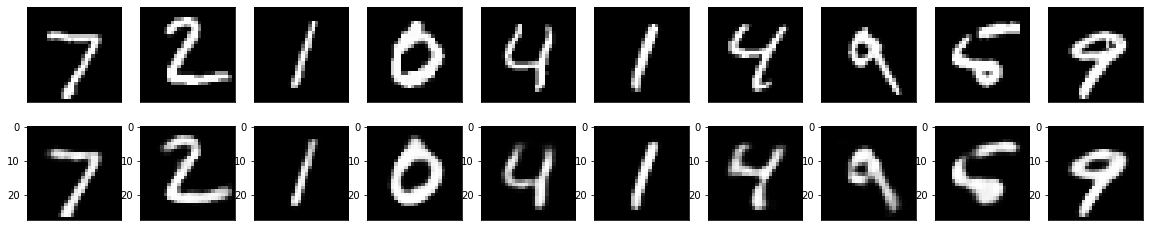

In [13]:
import matplotlib.pyplot as plt

n=10

plt.figure(figsize=(20,4))
for i in range(n):
  ax = plt.subplot(2,n,i+1)
  plt.imshow(X_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2,n,i+1+n)
  plt.imshow(decoded_imgs[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis()

plt.show()